In [1]:
import glob
import os
from datetime import datetime, timedelta
import pandas as pd
from functools import reduce

%config IPCompleter.greedy=True


fp = os.getcwd() + '/../../data/trends/*.csv'

files = glob.glob(fp)
latest_file = max(files, key=os.path.getctime)

In [2]:
files

['/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0429_2019_1605_usa-mia.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0429_2019_0622_usa-hou.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0429_2019_0542_usa-lax.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0429_2019_1124_usa-wdc.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0429_2019_1244_usa-sea.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0429_2019_1525_usa-phi.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0429_2019_1445_usa-chi.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0429_2019_0140_usa-nyc.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data

In [3]:
latest_file

'/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0429_2019_2000_usa-atl.csv'

In [4]:
latest_date_obj = datetime.strptime('_'.join(latest_file.split('_')[2:5]), '%m%d_%Y_%H%M')
latest_date_obj

datetime.datetime(2019, 4, 29, 20, 0)

In [5]:
time_location = '_'.join(latest_file.split('_')[2:6]).replace('.csv', '')
#.replace('.csv', '')
time_location

'0429_2019_2000_usa-atl'

In [6]:
less_than_day_old = [file for file in files if ((latest_date_obj - datetime.strptime('_'.join(file.split('_')[2:5]), '%m%d_%Y_%H%M')).seconds / 3600) < 6]
less_than_day_old

['/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0429_2019_1605_usa-mia.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0429_2019_1525_usa-phi.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0429_2019_1445_usa-chi.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0429_2019_1525_usa-bos.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0429_2019_1906_usa-dal.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0429_2019_1505_usa-lax.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0429_2019_1926_usa-mia.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0429_2019_1545_usa-nyc.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data

In [7]:
df_list = [pd.read_csv(file, index_col=0).rename(columns={'tweet_volume': 'tweet_volume_{}'.format('_'.join(file.split('_')[2:6]).replace('.csv', '')),
                                                         'promoted_content': 'promoted_content_{}'.format('_'.join(file.split('_')[2:6]).replace('.csv', ''))}) for file in less_than_day_old] 

In [8]:
# df = reduce(lambda df1,df2: pd.merge(df1,df2,on='name'), df_list)

In [9]:
df_merged = reduce(lambda  left,right: pd.merge(left, right, on=['name', 'query', 'url'], how='outer'), df_list)

In [10]:
df_merged

,name,promoted_content_0429_2019_1605_usa-mia,query,tweet_volume_0429_2019_1605_usa-mia,url,promoted_content_0429_2019_1525_usa-phi,tweet_volume_0429_2019_1525_usa-phi,promoted_content_0429_2019_1445_usa-chi,tweet_volume_0429_2019_1445_usa-chi,promoted_content_0429_2019_1525_usa-bos,...,promoted_content_0429_2019_1806_usa-phx,tweet_volume_0429_2019_1806_usa-phx,promoted_content_0429_2019_1525_usa-hou,tweet_volume_0429_2019_1525_usa-hou,promoted_content_0429_2019_1826_usa-chi,tweet_volume_0429_2019_1826_usa-chi,promoted_content_0429_2019_1926_usa-nyc,tweet_volume_0429_2019_1926_usa-nyc,promoted_content_0429_2019_1545_usa-mia,tweet_volume_0429_2019_1545_usa-mia
0,Arya,NaN,Arya,3452199.0,http://twitter.com/search?q=Arya,NaN,3387042.0,NaN,3320280.0,NaN,...,NaN,3615038.0,NaN,3387042.0,NaN,NaN,NaN,3696374.0,NaN,3421842.0
1,Night King,NaN,%22Night+King%22,1323264.0,http://twitter.com/search?q=%22Night+King%22,NaN,NaN,NaN,NaN,NaN,...,NaN,1403086.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1312338.0
2,#BattleOfWinterfell,NaN,%23BattleOfWinterfell,1166010.0,http://twitter.com/search?q=%23BattleOfWinterfell,NaN,NaN,NaN,NaN,NaN,...,NaN,1137354.0,NaN,NaN,NaN,NaN,NaN,1110732.0,NaN,1168486.0
3,#DemThrones,NaN,%23DemThrones,282240.0,http://twitter.com/search?q=%23DemThrones,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280610.0
4,#MondayMotivation,NaN,%23MondayMotivation,180500.0,http://twitter.com/search?q=%23MondayMotivation,NaN,NaN,NaN,167364.0,NaN,...,NaN,196071.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177621.0
5,#InternationalDanceDay,NaN,%23InternationalDanceDay,42687.0,http://twitter.com/search?q=%23InternationalDa...,NaN,NaN,NaN,36477.0,NaN,...,NaN,52127.0,NaN,NaN,NaN,53344.0,NaN,57872.0,NaN,41249.0
6,#MondayMood,NaN,%23MondayMood,18815.0,http://twitter.com/search?q=%23MondayMood,NaN,NaN,NaN,16839.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18363.0
7,#GameofThrones,NaN,%23GameofThrones,NaN,http://twitter.com/search?q=%23GameofThrones,NaN,NaN,NaN,4986610.0,NaN,...,NaN,5301916.0,NaN,NaN,NaN,NaN,NaN,5387306.0,NaN,5099299.0
8,John Singleton,NaN,%22John+Singleton%22,NaN,http://twitter.com/search?q=%22John+Singleton%22,NaN,NaN,NaN,46802.0,NaN,...,NaN,151244.0,NaN,NaN,NaN,159651.0,NaN,NaN,NaN,63875.0
9,Larry King,NaN,%22Larry+King%22,NaN,http://twitter.com/search?q=%22Larry+King%22,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
latest_file.split('_')[5].replace('.csv', '')

'usa-atl'

# Getting some basic trends statistics, graphing the data 

In [12]:
tweet_volume_df = df_merged.filter(regex=r'(name|tweet_volume.*)',axis=1)
tweet_volume_df = tweet_volume_df.copy(deep=True)
# tweet_volume_df['sum'] = tweet_volume_df.sum(numeric_only=True, axis=1)
tweet_volume_df['average'] = tweet_volume_df.mean(numeric_only=True, axis=1)
# tweet_volume_df['count'] = tweet_volume_df.count(numeric_only=True, axis=1)
tweet_volume_df = tweet_volume_df.sort_values(by=['average'], ascending=False).reset_index(drop=True)

In [13]:
tweet_volume_df

,name,tweet_volume_0429_2019_1605_usa-mia,tweet_volume_0429_2019_1525_usa-phi,tweet_volume_0429_2019_1445_usa-chi,tweet_volume_0429_2019_1525_usa-bos,tweet_volume_0429_2019_1906_usa-dal,tweet_volume_0429_2019_1505_usa-lax,tweet_volume_0429_2019_1926_usa-mia,tweet_volume_0429_2019_1545_usa-nyc,tweet_volume_0429_2019_1625_usa-dal,...,tweet_volume_0429_2019_1625_usa-chi,tweet_volume_0429_2019_1947_usa-sfo,tweet_volume_0429_2019_1706_usa-wdc,tweet_volume_0429_2019_1605_usa-nyc,tweet_volume_0429_2019_1806_usa-phx,tweet_volume_0429_2019_1525_usa-hou,tweet_volume_0429_2019_1826_usa-chi,tweet_volume_0429_2019_1926_usa-nyc,tweet_volume_0429_2019_1545_usa-mia,average
0,#GameofThrones,NaN,NaN,4986610.0,NaN,5351723.0,NaN,5387306.0,5099299.0,5154963.0,...,5154963.0,5419370.0,5235379.0,NaN,5301916.0,NaN,NaN,5387306.0,5099299.0,5.209493e+06
1,Arya,3452199.0,3387042.0,3320280.0,3387042.0,3670663.0,NaN,3696374.0,3421842.0,3477865.0,...,3477865.0,3721007.0,3552530.0,3452199.0,3615038.0,3387042.0,NaN,3696374.0,3421842.0,3.518320e+06
2,Night King,1323264.0,NaN,NaN,NaN,1438355.0,NaN,1450348.0,1312338.0,1334631.0,...,1334631.0,NaN,1364239.0,1323264.0,1403086.0,NaN,NaN,NaN,1312338.0,1.347714e+06
3,#BattleOfWinterfell,1166010.0,NaN,NaN,NaN,1107097.0,NaN,1110732.0,1168486.0,1169967.0,...,1169967.0,1114206.0,1154774.0,1166010.0,1137354.0,NaN,NaN,1110732.0,1168486.0,1.150833e+06
4,Arya Stark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.744248e+05
5,Game of Thrones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.229860e+05
6,Bran,NaN,NaN,NaN,NaN,NaN,NaN,745581.0,NaN,NaN,...,NaN,NaN,NaN,NaN,717501.0,NaN,NaN,NaN,NaN,7.040945e+05
7,Cersei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.021177e+05
8,#NotToday,NaN,NaN,332427.0,354203.0,NaN,343612.0,NaN,364493.0,NaN,...,NaN,NaN,NaN,374098.0,NaN,354203.0,NaN,NaN,NaN,3.406862e+05
9,#DemThrones,282240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280610.0,2.835293e+05


In [14]:
# tweet_volume_df_2.to_json('by_name.json')

In [15]:
# import json
# from pprint import pprint

# # tweet_volume_json_data = json.loads('by_name.json')[0]

# os.path.exists('by_name.json')

# with open('by_name.json') as f:
#     tweet_volume_json_data = json.load(f)


In [16]:
# tweet_volume_json_data

In [17]:
tweet_volume_dc_df = tweet_volume_df.filter(regex=r'(name|wdc)',axis=1)
tweet_volume_dc_df = tweet_volume_dc_df.copy(deep=True)
# tweet_volume_dc_df['sum'] = tweet_volume_dc_df.sum(numeric_only=True, axis=1)
tweet_volume_dc_df['average'] = tweet_volume_dc_df.mean(numeric_only=True, axis=1)
# tweet_volume_dc_df['count'] = tweet_volume_dc_df.count(numeric_only=True, axis=1)
tweet_volume_dc_df = tweet_volume_dc_df.sort_values(by=['average'], ascending=False).reset_index(drop=True)
tweet_volume_dc_df = tweet_volume_dc_df.set_index('name', drop=True)

In [18]:
tweet_volume_dc_df

,tweet_volume_0429_2019_1726_usa-wdc,tweet_volume_0429_2019_1746_usa-wdc,tweet_volume_0429_2019_1505_usa-wdc,tweet_volume_0429_2019_1425_usa-wdc,tweet_volume_0429_2019_1926_usa-wdc,tweet_volume_0429_2019_1605_usa-wdc,tweet_volume_0429_2019_1806_usa-wdc,tweet_volume_0429_2019_1445_usa-wdc,tweet_volume_0429_2019_1625_usa-wdc,tweet_volume_0429_2019_1906_usa-wdc,tweet_volume_0429_2019_1826_usa-wdc,tweet_volume_0429_2019_1545_usa-wdc,tweet_volume_0429_2019_1846_usa-wdc,tweet_volume_0429_2019_1525_usa-wdc,tweet_volume_0429_2019_1405_usa-wdc,tweet_volume_0429_2019_2000_usa-wdc,tweet_volume_0429_2019_1646_usa-wdc,tweet_volume_0429_2019_1947_usa-wdc,tweet_volume_0429_2019_1706_usa-wdc,average
name,,,,,,,,,,,,,,,,,,,,
#GameofThrones,5244335.0,5313923.0,NaN,4943147.0,5387306.0,NaN,5301916.0,4986610.0,5154963.0,5351723.0,5344109.0,5099299.0,5384617.0,NaN,4880853.0,5443215.0,5214083.0,5419370.0,5235379.0,5.231553e+06
Arya,3585073.0,3610013.0,NaN,3284510.0,3696374.0,3452199.0,3615038.0,3320280.0,3477865.0,3670663.0,3646136.0,3421842.0,3676118.0,3387042.0,3248355.0,3738524.0,3521527.0,3721007.0,3552530.0,3.534728e+06
Night King,1378416.0,1389320.0,NaN,1252598.0,1450348.0,1323264.0,1403086.0,1268444.0,1334631.0,1438355.0,1416883.0,1312338.0,1430404.0,NaN,1236134.0,1469671.0,1353762.0,1461603.0,1364239.0,1.369617e+06
#BattleOfWinterfell,1159979.0,1164131.0,1157803.0,1152311.0,1110732.0,1166010.0,1137354.0,1157967.0,1169967.0,1107097.0,1141874.0,1168486.0,1146297.0,NaN,1146565.0,1116737.0,1176654.0,1114206.0,1154774.0,1.147164e+06
Arya Stark,NaN,NaN,774916.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.749160e+05
#NotToday,NaN,NaN,NaN,321476.0,NaN,NaN,NaN,332427.0,NaN,NaN,NaN,NaN,NaN,NaN,310333.0,NaN,NaN,NaN,NaN,3.214120e+05
Views,196156.0,198095.0,NaN,NaN,195243.0,NaN,193226.0,NaN,197238.0,192388.0,195503.0,200979.0,197810.0,NaN,NaN,NaN,200520.0,197915.0,NaN,1.968248e+05
#MondayMotivation,191836.0,NaN,170747.0,163453.0,NaN,180500.0,NaN,167364.0,182874.0,NaN,NaN,177621.0,NaN,NaN,159174.0,NaN,186784.0,NaN,189190.0,1.769543e+05
John Singleton,125320.0,136026.0,52511.0,41163.0,192318.0,NaN,151244.0,46802.0,72408.0,182700.0,162344.0,63875.0,172856.0,NaN,35846.0,209341.0,88704.0,202153.0,108833.0,1.202614e+05


In [19]:
dc_volume_dict = tweet_volume_dc_df.to_dict(orient='index')


In [20]:
# import json
# with open('by_name.json', 'w') as f:
#     json.dump(dc_volume_dict, f)

In [21]:
tweet_volume_nyc_df = tweet_volume_df.filter(regex=r'(name|nyc)',axis=1)
tweet_volume_nyc_df = tweet_volume_nyc_df.copy(deep=True)
# tweet_volume_nyc_df['sum'] = tweet_volume_nyc_df.sum(numeric_only=True, axis=1)
# tweet_volume_nyc_df['count'] = tweet_volume_nyc_df.count(numeric_only=True, axis=1)
tweet_volume_nyc_df['average'] = tweet_volume_nyc_df.mean(numeric_only=True, axis=1)
tweet_volume_nyc_df = tweet_volume_nyc_df.sort_values(by=['average'], ascending=False).reset_index(drop=True)
tweet_volume_nyc_df = tweet_volume_nyc_df.set_index('name', drop=True)


In [22]:
tweet_volume_nyc_df

,tweet_volume_0429_2019_1545_usa-nyc,tweet_volume_0429_2019_1826_usa-nyc,tweet_volume_0429_2019_1906_usa-nyc,tweet_volume_0429_2019_1625_usa-nyc,tweet_volume_0429_2019_1405_usa-nyc,tweet_volume_0429_2019_1525_usa-nyc,tweet_volume_0429_2019_1846_usa-nyc,tweet_volume_0429_2019_1646_usa-nyc,tweet_volume_0429_2019_2000_usa-nyc,tweet_volume_0429_2019_1706_usa-nyc,tweet_volume_0429_2019_1947_usa-nyc,tweet_volume_0429_2019_1726_usa-nyc,tweet_volume_0429_2019_1746_usa-nyc,tweet_volume_0429_2019_1425_usa-nyc,tweet_volume_0429_2019_1505_usa-nyc,tweet_volume_0429_2019_1445_usa-nyc,tweet_volume_0429_2019_1806_usa-nyc,tweet_volume_0429_2019_1605_usa-nyc,tweet_volume_0429_2019_1926_usa-nyc,average
name,,,,,,,,,,,,,,,,,,,,
#GameofThrones,5099299.0,5344109.0,5413738.0,5154963.0,4880853.0,NaN,5384617.0,5202697.0,5435333.0,5219212.0,5419370.0,5244335.0,5325489.0,4943147.0,5010061.0,4986610.0,5301916.0,NaN,5387306.0,5.220768e+06
Arya,3421842.0,3646136.0,3697009.0,3477865.0,3248355.0,3387042.0,3676118.0,3513096.0,3732595.0,3546535.0,3721007.0,3585073.0,3618273.0,3284510.0,3352784.0,3320280.0,3615038.0,3452199.0,3696374.0,3.525902e+06
Night King,1312338.0,NaN,NaN,1334631.0,1236134.0,NaN,NaN,1350256.0,NaN,1364565.0,NaN,1378416.0,1393019.0,1252598.0,1280981.0,1268444.0,NaN,1323264.0,NaN,1.317695e+06
#BattleOfWinterfell,1168486.0,1141874.0,1149222.0,1169967.0,1146565.0,NaN,1146297.0,1175383.0,1115904.0,1180618.0,1114206.0,1159979.0,1165466.0,1152311.0,1157708.0,1157967.0,1137354.0,1166010.0,1110732.0,1.150892e+06
#NotToday,364493.0,NaN,NaN,381784.0,310333.0,354203.0,NaN,391843.0,NaN,401107.0,NaN,NaN,NaN,321476.0,NaN,332427.0,NaN,374098.0,NaN,3.590849e+05
Views,200979.0,195503.0,199746.0,197238.0,NaN,NaN,197810.0,199974.0,NaN,NaN,197915.0,196156.0,NaN,NaN,NaN,NaN,193226.0,NaN,195243.0,1.973790e+05
Dothraki,NaN,NaN,NaN,NaN,173875.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176588.0,181780.0,179204.0,NaN,NaN,NaN,1.778618e+05
#MondayMotivation,177621.0,NaN,NaN,182874.0,159174.0,NaN,NaN,186139.0,NaN,188672.0,NaN,191836.0,NaN,163453.0,170669.0,167364.0,NaN,180500.0,NaN,1.768302e+05
Etika,97121.0,113691.0,116571.0,102677.0,79910.0,NaN,115459.0,105834.0,117904.0,108455.0,117258.0,110714.0,113143.0,82406.0,88202.0,84776.0,112017.0,NaN,115866.0,1.048238e+05


In [23]:
tweet_volume_nyc_df = tweet_volume_nyc_df.dropna(subset=['average'])
# tweet_volume_nyc_df.to_csv('nyc_trends.csv')

In [24]:
columns = sorted(list(tweet_volume_nyc_df.columns))
tweet_volume_nyc_df = tweet_volume_nyc_df[columns]

tweet_volume_nyc_df

,average,tweet_volume_0429_2019_1405_usa-nyc,tweet_volume_0429_2019_1425_usa-nyc,tweet_volume_0429_2019_1445_usa-nyc,tweet_volume_0429_2019_1505_usa-nyc,tweet_volume_0429_2019_1525_usa-nyc,tweet_volume_0429_2019_1545_usa-nyc,tweet_volume_0429_2019_1605_usa-nyc,tweet_volume_0429_2019_1625_usa-nyc,tweet_volume_0429_2019_1646_usa-nyc,tweet_volume_0429_2019_1706_usa-nyc,tweet_volume_0429_2019_1726_usa-nyc,tweet_volume_0429_2019_1746_usa-nyc,tweet_volume_0429_2019_1806_usa-nyc,tweet_volume_0429_2019_1826_usa-nyc,tweet_volume_0429_2019_1846_usa-nyc,tweet_volume_0429_2019_1906_usa-nyc,tweet_volume_0429_2019_1926_usa-nyc,tweet_volume_0429_2019_1947_usa-nyc,tweet_volume_0429_2019_2000_usa-nyc
name,,,,,,,,,,,,,,,,,,,,
#GameofThrones,5.220768e+06,4880853.0,4943147.0,4986610.0,5010061.0,NaN,5099299.0,NaN,5154963.0,5202697.0,5219212.0,5244335.0,5325489.0,5301916.0,5344109.0,5384617.0,5413738.0,5387306.0,5419370.0,5435333.0
Arya,3.525902e+06,3248355.0,3284510.0,3320280.0,3352784.0,3387042.0,3421842.0,3452199.0,3477865.0,3513096.0,3546535.0,3585073.0,3618273.0,3615038.0,3646136.0,3676118.0,3697009.0,3696374.0,3721007.0,3732595.0
Night King,1.317695e+06,1236134.0,1252598.0,1268444.0,1280981.0,NaN,1312338.0,1323264.0,1334631.0,1350256.0,1364565.0,1378416.0,1393019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#BattleOfWinterfell,1.150892e+06,1146565.0,1152311.0,1157967.0,1157708.0,NaN,1168486.0,1166010.0,1169967.0,1175383.0,1180618.0,1159979.0,1165466.0,1137354.0,1141874.0,1146297.0,1149222.0,1110732.0,1114206.0,1115904.0
#NotToday,3.590849e+05,310333.0,321476.0,332427.0,NaN,354203.0,364493.0,374098.0,381784.0,391843.0,401107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Views,1.973790e+05,NaN,NaN,NaN,NaN,NaN,200979.0,NaN,197238.0,199974.0,NaN,196156.0,NaN,193226.0,195503.0,197810.0,199746.0,195243.0,197915.0,NaN
Dothraki,1.778618e+05,173875.0,176588.0,179204.0,181780.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#MondayMotivation,1.768302e+05,159174.0,163453.0,167364.0,170669.0,NaN,177621.0,180500.0,182874.0,186139.0,188672.0,191836.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Etika,1.048238e+05,79910.0,82406.0,84776.0,88202.0,NaN,97121.0,NaN,102677.0,105834.0,108455.0,110714.0,113143.0,112017.0,113691.0,115459.0,116571.0,115866.0,117258.0,117904.0


In [29]:
import matplotlib.pyplot as plt
plt.style.use('grayscale')
plt.rcParams['figure.dpi'] = 180
plt.rcParams.update({'font.size': 3, 'font.weight': 100})

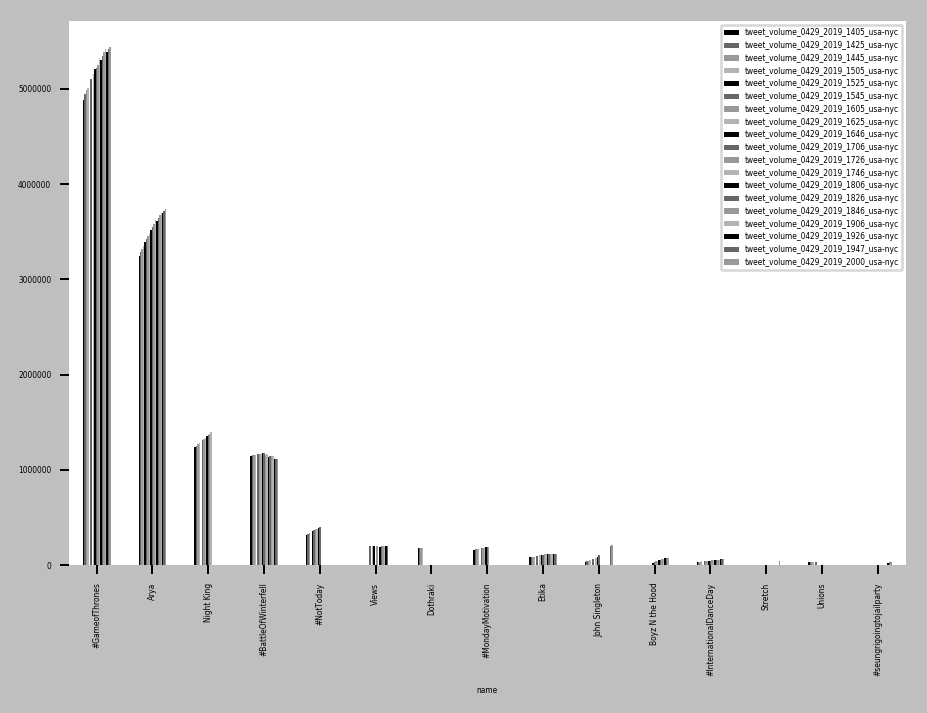

In [31]:
ax = tweet_volume_nyc_df.head(n=15).drop(['average'], axis=1).plot(kind='bar', stacked=False)
# tweet_volume_nyc_df['average'].plot(kind='line', ax=ax)
ax.grid(False)
for spine in ax.spines:
    ax.spines[spine].set_visible(False)


plt.savefig('nyc_pastday_trend_info_top15.pdf', bbox_inches="tight")
plt.savefig('nyc_pastday_trend_info_top15.png', bbox_inches="tight")